<a href="https://colab.research.google.com/github/Parinita-Jain/ITvedant/blob/main/EarlyStoppingAndModelCheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels reshaped for one-hot encoding

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define a simple deep learning model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for the Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop if validation loss doesn't improve
    patience=5,          # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best weights after stopping
)

model_checkpoint = ModelCheckpoint(
    filepath='best_iris_model.h5',  # Save the best model
    monitor='val_loss',
    save_best_only=True
)

# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate the model on validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:22 6s/step - accuracy: 0.2500 - loss: 1.1878

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3848 - loss: 1.1083 - val_accuracy: 0.5667 - val_loss: 1.0175
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7500 - loss: 0.9968

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5546 - loss: 1.0097 - val_accuracy: 0.6000 - val_loss: 0.9687
Epoch 3/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6250 - loss: 1.0109

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6769 - loss: 0.9808 - val_accuracy: 0.7667 - val_loss: 0.9252
Epoch 4/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8750 - loss: 0.8208

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7613 - loss: 0.9142 - val_accuracy: 0.7667 - val_loss: 0.8824
Epoch 5/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.8750 - loss: 0.8279

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7568 - loss: 0.8887 - val_accuracy: 0.8000 - val_loss: 0.8372
Epoch 6/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.8676

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7508 - loss: 0.8717 - val_accuracy: 0.8333 - val_loss: 0.7874
Epoch 7/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8750 - loss: 0.7964

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7986 - loss: 0.8089 - val_accuracy: 0.9000 - val_loss: 0.7345
Epoch 8/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.6813

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8521 - loss: 0.7616 - val_accuracy: 0.9000 - val_loss: 0.6796
Epoch 9/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.8750 - loss: 0.7303

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8263 - loss: 0.7261 - val_accuracy: 0.9000 - val_loss: 0.6202
Epoch 10/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 1.0000 - loss: 0.6989

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8268 - loss: 0.6843 - val_accuracy: 0.9000 - val_loss: 0.5588
Epoch 11/100
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8526 - loss: 0.6031 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8472 - loss: 0.5990 - val_accuracy: 0.9000 - val_loss: 0.4956
Epoch 12/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7500 - loss: 0.5541

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8171 - loss: 0.5434 - val_accuracy: 0.9000 - val_loss: 0.4403
Epoch 13/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.8750 - loss: 0.5176

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7819 - loss: 0.5342 - val_accuracy: 0.9000 - val_loss: 0.3952
Epoch 14/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.3186

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8718 - loss: 0.4332 - val_accuracy: 0.9000 - val_loss: 0.3579
Epoch 15/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8750 - loss: 0.3621

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8080 - loss: 0.4288 - val_accuracy: 0.9000 - val_loss: 0.3300
Epoch 16/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8750 - loss: 0.4669

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4083 - val_accuracy: 0.9000 - val_loss: 0.3073
Epoch 17/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7500 - loss: 0.4327

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8099 - loss: 0.4005 - val_accuracy: 0.9000 - val_loss: 0.2891
Epoch 18/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7500 - loss: 0.5074

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8494 - loss: 0.3978 - val_accuracy: 0.9333 - val_loss: 0.2724
Epoch 19/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.3310

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8811 - loss: 0.3490 - val_accuracy: 0.9333 - val_loss: 0.2589
Epoch 20/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8750 - loss: 0.3289

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8547 - loss: 0.3425 - val_accuracy: 0.9333 - val_loss: 0.2474
Epoch 21/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.2227

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8817 - loss: 0.3385 - val_accuracy: 0.9667 - val_loss: 0.2373
Epoch 22/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8750 - loss: 0.3751

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9084 - loss: 0.2905 - val_accuracy: 0.9333 - val_loss: 0.2262
Epoch 23/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8750 - loss: 0.4577

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8756 - loss: 0.3275 - val_accuracy: 0.9667 - val_loss: 0.2177
Epoch 24/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 1.0000 - loss: 0.2515

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9030 - loss: 0.2810 - val_accuracy: 0.9667 - val_loss: 0.2090
Epoch 25/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.2156

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8961 - loss: 0.2905 - val_accuracy: 0.9667 - val_loss: 0.2008
Epoch 26/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.3231

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9069 - loss: 0.2932 - val_accuracy: 0.9667 - val_loss: 0.1930
Epoch 27/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.3533

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9154 - loss: 0.2760 - val_accuracy: 0.9667 - val_loss: 0.1860
Epoch 28/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 1.0000 - loss: 0.1102

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9238 - loss: 0.2300 - val_accuracy: 0.9667 - val_loss: 0.1798
Epoch 29/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8750 - loss: 0.3569

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8749 - loss: 0.3002 - val_accuracy: 0.9667 - val_loss: 0.1752
Epoch 30/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8750 - loss: 0.4222

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9007 - loss: 0.2789 - val_accuracy: 0.9667 - val_loss: 0.1680
Epoch 31/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.2452

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9441 - loss: 0.2240 - val_accuracy: 0.9667 - val_loss: 0.1619
Epoch 32/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1138

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9400 - loss: 0.1962 - val_accuracy: 0.9667 - val_loss: 0.1557
Epoch 33/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8750 - loss: 0.2304

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9196 - loss: 0.2139 - val_accuracy: 0.9667 - val_loss: 0.1513
Epoch 34/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0961

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9470 - loss: 0.1866 - val_accuracy: 0.9667 - val_loss: 0.1469
Epoch 35/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1789

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9620 - loss: 0.1760 - val_accuracy: 0.9667 - val_loss: 0.1405
Epoch 36/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7500 - loss: 0.4595

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9232 - loss: 0.2225 - val_accuracy: 0.9667 - val_loss: 0.1353
Epoch 37/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.1392

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9636 - loss: 0.1661 - val_accuracy: 0.9667 - val_loss: 0.1304
Epoch 38/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.1337

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9733 - loss: 0.1510 - val_accuracy: 0.9667 - val_loss: 0.1286
Epoch 39/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8750 - loss: 0.1722

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9428 - loss: 0.1442 - val_accuracy: 0.9667 - val_loss: 0.1241
Epoch 40/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8750 - loss: 0.2256

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9590 - loss: 0.1620 - val_accuracy: 0.9667 - val_loss: 0.1198
Epoch 41/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.1001

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9636 - loss: 0.1515 - val_accuracy: 0.9667 - val_loss: 0.1146
Epoch 42/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.2754

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9757 - loss: 0.1536 - val_accuracy: 0.9667 - val_loss: 0.1101
Epoch 43/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 0.1154

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9633 - loss: 0.1478 - val_accuracy: 0.9667 - val_loss: 0.1065
Epoch 44/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0870

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9824 - loss: 0.1240 - val_accuracy: 0.9667 - val_loss: 0.1058
Epoch 45/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 1.0000 - loss: 0.2022

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9687 - loss: 0.1581 - val_accuracy: 0.9667 - val_loss: 0.1001
Epoch 46/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.8750 - loss: 0.1569

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9557 - loss: 0.1323 - val_accuracy: 1.0000 - val_loss: 0.0973
Epoch 47/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 1.0000 - loss: 0.0908

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9846 - loss: 0.1077 - val_accuracy: 1.0000 - val_loss: 0.0945
Epoch 48/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 1.0000 - loss: 0.0589

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9828 - loss: 0.1049 - val_accuracy: 1.0000 - val_loss: 0.0909
Epoch 49/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8750 - loss: 0.2159

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9549 - loss: 0.1456 - val_accuracy: 1.0000 - val_loss: 0.0893
Epoch 50/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0979

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9777 - loss: 0.1084 - val_accuracy: 1.0000 - val_loss: 0.0870
Epoch 51/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0617

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9740 - loss: 0.1003 - val_accuracy: 1.0000 - val_loss: 0.0848
Epoch 52/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1625

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9830 - loss: 0.1200 - val_accuracy: 1.0000 - val_loss: 0.0824
Epoch 53/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1944

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9777 - loss: 0.1374 - val_accuracy: 1.0000 - val_loss: 0.0779
Epoch 54/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9510 - loss: 0.1166 - val_accuracy: 1.0000 - val_loss: 0.0788
Epoch 55/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0550

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9582 - loss: 0.1196 - val_accuracy: 1.0000 - val_loss: 0.0742
Epoch 56/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0578

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9669 - loss: 0.1102 - val_accuracy: 1.0000 - val_loss: 0.0740
Epoch 57/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0166

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9642 - loss: 0.1126 - val_accuracy: 1.0000 - val_loss: 0.0718
Epoch 58/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0312

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9808 - loss: 0.0882 - val_accuracy: 1.0000 - val_loss: 0.0700
Epoch 59/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9818 - loss: 0.0943 - val_accuracy: 1.0000 - val_loss: 0.0701
Epoch 60/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.1164

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9639 - loss: 0.1117 - val_accuracy: 1.0000 - val_loss: 0.0639
Epoch 61/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9444 - loss: 0.1218 - val_accuracy: 1.0000 - val_loss: 0.0652
Epoch 62/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9638 - loss: 0.0893 - val_accuracy: 1.0000 - val_loss: 0.0669
Epoch 63/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0498

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9733 - loss: 0.0840 - val_accuracy: 1.0000 - val_loss: 0.0614
Epoch 64/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9833 - loss: 0.0875 - val_accuracy: 1.0000 - val_loss: 0.0616
Epoch 65/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9606 - loss: 0.0975 - val_accuracy: 1.0000 - val_loss: 0.0619
Epoch 66/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.1474

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9889 - loss: 0.0753 - val_accuracy: 1.0000 - val_loss: 0.0580
Epoch 67/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0183

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9712 - loss: 0.0770 - val_accuracy: 1.0000 - val_loss: 0.0556
Epoch 68/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9914 - loss: 0.0671 - val_accuracy: 1.0000 - val_loss: 0.0587
Epoch 69/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0829

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9846 - loss: 0.0767 - val_accuracy: 1.0000 - val_loss: 0.0540
Epoch 70/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0365

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9481 - loss: 0.0971 - val_accuracy: 1.0000 - val_loss: 0.0539
Epoch 71/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0416

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9627 - loss: 0.0864 - val_accuracy: 1.0000 - val_loss: 0.0532
Epoch 72/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0581

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9616 - loss: 0.0863 - val_accuracy: 1.0000 - val_loss: 0.0524
Epoch 73/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0624

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9834 - loss: 0.0712 - val_accuracy: 1.0000 - val_loss: 0.0518
Epoch 74/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8750 - loss: 0.1614

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.0841 - val_accuracy: 1.0000 - val_loss: 0.0498
Epoch 75/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0206

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9658 - loss: 0.0666 - val_accuracy: 1.0000 - val_loss: 0.0489
Epoch 76/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9622 - loss: 0.0895 - val_accuracy: 1.0000 - val_loss: 0.0497
Epoch 77/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 1.0000 - loss: 0.0379

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9747 - loss: 0.0677 - val_accuracy: 1.0000 - val_loss: 0.0469
Epoch 78/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0354

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9629 - loss: 0.0713 - val_accuracy: 1.0000 - val_loss: 0.0460
Epoch 79/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9841 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 0.0478
Epoch 80/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9876 - loss: 0.0533 - val_accuracy: 1.0000 - val_loss: 0.0464
Epoch 81/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0355

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9690 - loss: 0.0700 - val_accuracy: 1.0000 - val_loss: 0.0436
Epoch 82/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9769 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0445
Epoch 83/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9787 - loss: 0.0624 - val_accuracy: 1.0000 - val_loss: 0.0451
Epoch 84/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0128

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9590 - loss: 0.0678 - val_accuracy: 1.0000 - val_loss: 0.0427
Epoch 85/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9521 - loss: 0.0971 - val_accuracy: 1.0000 - val_loss: 0.0432
Epoch 86/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0430

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9843 - loss: 0.0716 - val_accuracy: 1.0000 - val_loss: 0.0411
Epoch 87/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9948 - loss: 0.0582 - val_accuracy: 1.0000 - val_loss: 0.0438
Epoch 88/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9913 - loss: 0.0447 - val_accuracy: 1.0000 - val_loss: 0.0421
Epoch 89/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0178

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9764 - loss: 0.0560 - val_accuracy: 1.0000 - val_loss: 0.0380
Epoch 90/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9827 - loss: 0.0632 - val_accuracy: 1.0000 - val_loss: 0.0385
Epoch 91/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9657 - loss: 0.0762 - val_accuracy: 1.0000 - val_loss: 0.0385
Epoch 92/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9487 - loss: 0.0846 - val_accuracy: 1.0000 - val_loss: 0.0399
Epoch 93/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9843 - loss: 0.0553 - val_accuracy: 1.0000 - val_loss: 0.0382
Epoch 94/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9814 - loss: 0.0433 - val_accuracy: 1.0000 - val_loss: 0.0383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0380
Validation Accuracy: 1.0000


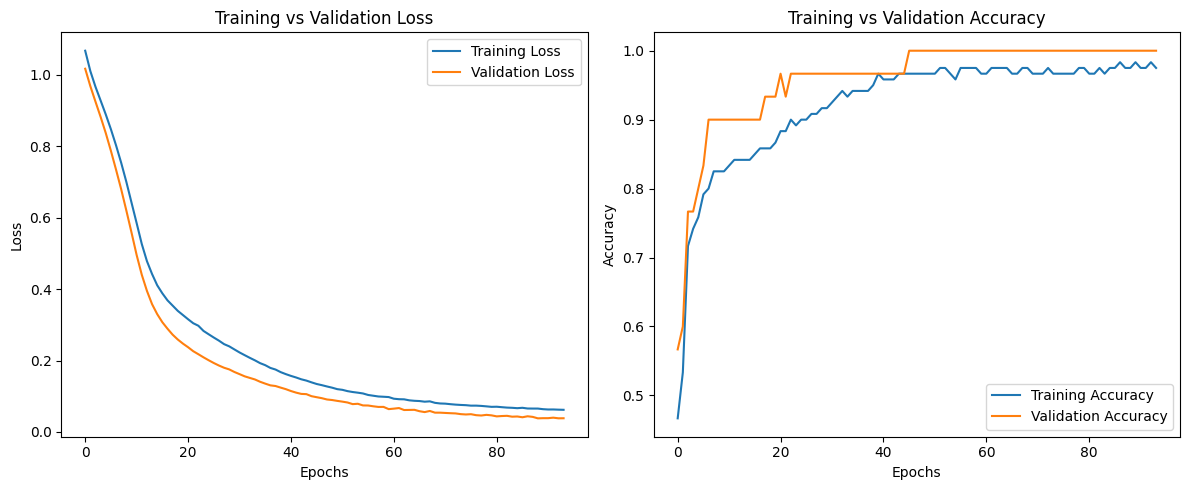

In [2]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
